#1. EDA for PFW_count_site_data_public_2021.csv

## (0) Load the data PFW_count_site_data_public_2021.csv

In [ ]:
# 0) Setup + Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/PFW_count_site_data_public_2021.csv"
df = pd.read_csv(path)

print("Shape (rows, cols):", df.shape)
display(df.head())
print("\nInfo:")
df.info()

# Basic column groups

id_cols = ["loc_id", "proj_period_id"]

yard_cols = [c for c in df.columns if c.startswith("yard_type_")]
hab_cols  = [c for c in df.columns if c.startswith("hab_")]

veg_struct_cols = [
    "evgr_trees_atleast", "evgr_shrbs_atleast", "dcid_trees_atleast", "dcid_shrbs_atleast",
    "fru_trees_atleast", "cacti_atleast", "brsh_piles_atleast", "water_srcs_atleast",
    "bird_baths_atleast"
]

disturb_cols = ["nearby_feeders", "squirrels", "cats", "dogs", "humans", "housing_density"]

feed_month_cols = [c for c in df.columns if c.startswith("fed_in_")]
feed_year_cols = ["fed_yr_round"]

numfeeder_cols = [c for c in df.columns if c.startswith("numfeeders_")]

scale_cols = ["population_atleast", "count_area_size_sq_m_atleast"]

all_feature_cols = yard_cols + hab_cols + veg_struct_cols + disturb_cols + feed_year_cols + feed_month_cols + numfeeder_cols + scale_cols

print("\nColumn group sizes:")
print("yard:", len(yard_cols), "hab:", len(hab_cols), "veg_struct:", len(veg_struct_cols),
      "disturb:", len(disturb_cols), "feed_month:", len(feed_month_cols),
      "numfeeders:", len(numfeeder_cols), "scale:", len(scale_cols))

Shape (rows, cols): (254355, 62)


,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L100016,PFW_2002,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.01
1,L100016,PFW_2003,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
2,L100016,PFW_2004,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
3,L100016,PFW_2005,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
4,L100016,PFW_2006,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.01



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254355 entries, 0 to 254354
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loc_id                        254355 non-null  object 
 1   proj_period_id                254355 non-null  object 
 2   yard_type_pavement            185478 non-null  float64
 3   yard_type_garden              186073 non-null  float64
 4   yard_type_landsca             191338 non-null  float64
 5   yard_type_woods               186727 non-null  float64
 6   yard_type_desert              185573 non-null  float64
 7   hab_dcid_woods                204241 non-null  float64
 8   hab_evgr_woods                192665 non-null  float64
 9   hab_mixed_woods               211951 non-null  float64
 10  hab_orchard                   174756 non-null  float64
 11  hab_park                      137821 non-null  float64
 12  hab_water_fresh               207096 

## (1) Missingness + Sparsity (0-heavy)

In [ ]:
# =========================
# 1) Missingness + Sparsity (0-heavy)
# =========================
missing_count = df[all_feature_cols].isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct})
print("\nTop missing columns:")
display(missing_table.head(15))

# Sparsity: percent of zeros (useful because many columns are 0/1 or counts)
zero_pct = {}
for c in all_feature_cols:
    if pd.api.types.is_numeric_dtype(df[c]):
        zero_pct[c] = (df[c].fillna(0) == 0).mean()
zero_table = pd.Series(zero_pct).sort_values(ascending=False).to_frame("zero_fraction")
print("\nTop zero-heavy columns:")
display(zero_table.head(15))


Top missing columns:


,missing_count,missing_pct
numfeeders_thistle,179792,70.69
fed_yr_round,173165,68.08
numfeeders_other,162542,63.90
numfeeders_water,155125,60.99
numfeeders_hanging,150162,59.04
numfeeders_hopper,136248,53.57
numfeeders_tube,124165,48.82
hab_park,116534,45.82
hab_swamp,115086,45.25
numfeeders_fruit,98995,38.92



Top zero-heavy columns:


,zero_fraction
yard_type_pavement,0.998695
yard_type_desert,0.994244
yard_type_garden,0.969963
hab_water_salt,0.964475
cacti_atleast,0.948698
hab_desert_scrub,0.934253
hab_orchard,0.933652
numfeeders_fruit,0.931234
hab_marsh,0.885691
numfeeders_other,0.868703


##（2）Distribution quick scan (long-tail / imbalance)

,col,non_null,missing_pct,mean,std,min,p50,p90,p99,max,zero_frac
53,numfeeders_thistle,74563,70.685459,1.002414,1.002101,0.0,1.0,2.0,4.0,50.0,0.794099
34,fed_yr_round,81190,68.080046,0.781660,0.413122,0.0,1.0,1.0,1.0,1.0,0.750494
57,numfeeders_other,91813,63.903599,0.610360,1.244581,0.0,0.0,2.0,5.0,99.0,0.868703
52,numfeeders_water,99230,60.987596,0.780147,0.998016,0.0,1.0,2.0,4.0,20.0,0.793792
49,numfeeders_hanging,104193,59.036386,2.696045,1.896756,0.0,2.0,5.0,8.0,55.0,0.624014
55,numfeeders_hopper,118107,53.566079,1.392246,1.654970,0.0,1.0,3.0,6.0,211.0,0.655037
56,numfeeders_tube,130190,48.815632,2.165366,1.815095,0.0,2.0,4.0,8.0,104.0,0.533164
9,hab_park,137821,45.815494,0.453987,0.497880,0.0,0.0,1.0,1.0,1.0,0.754009
17,hab_swamp,139269,45.246211,0.294042,0.455613,0.0,0.0,1.0,1.0,1.0,0.839001
54,numfeeders_fruit,155360,38.920013,0.143982,0.730077,0.0,0.0,1.0,2.0,112.0,0.931234


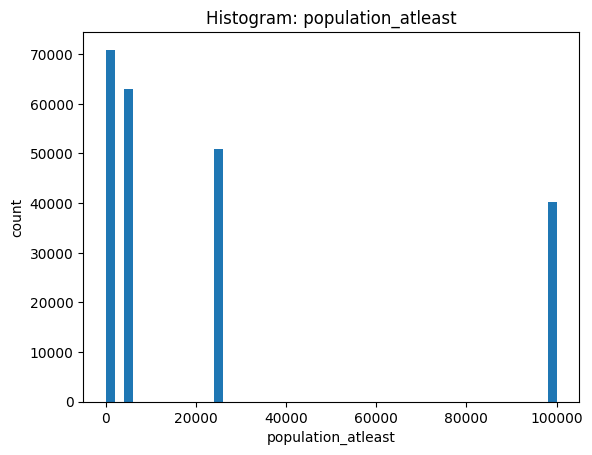

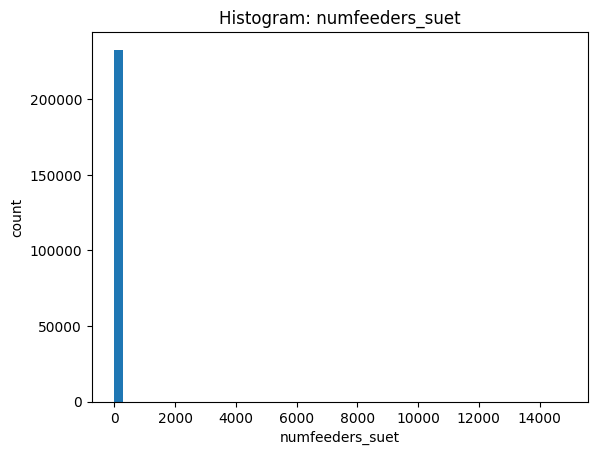

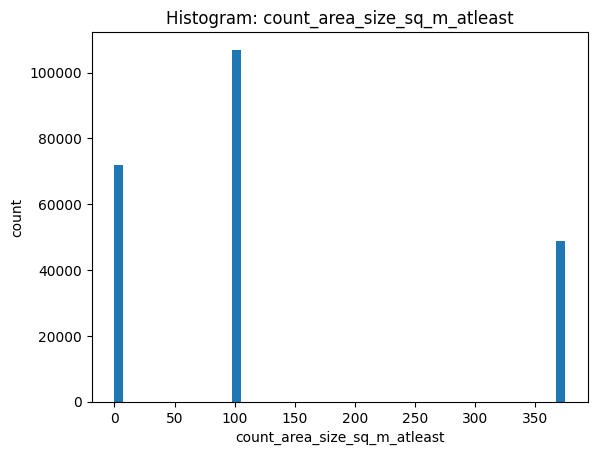

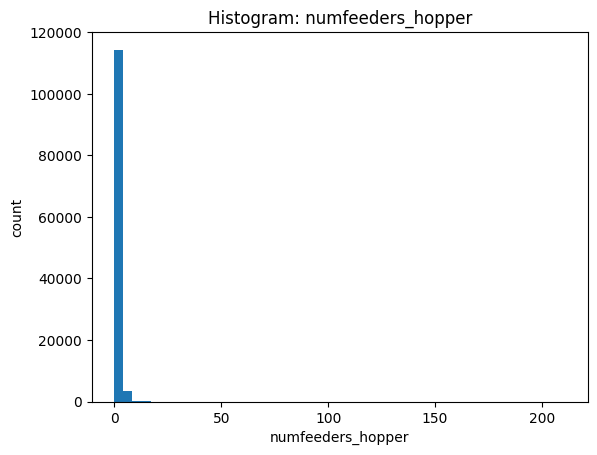

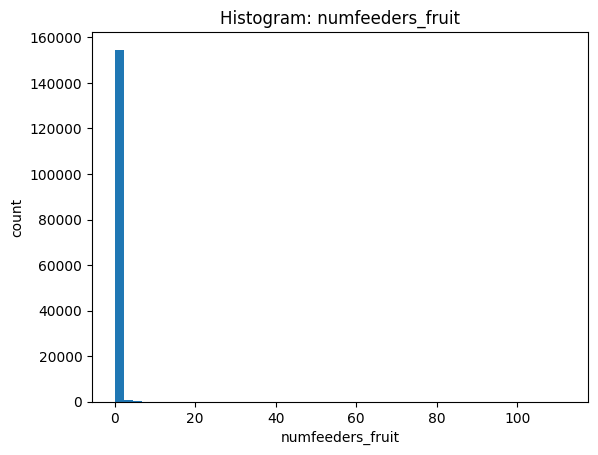

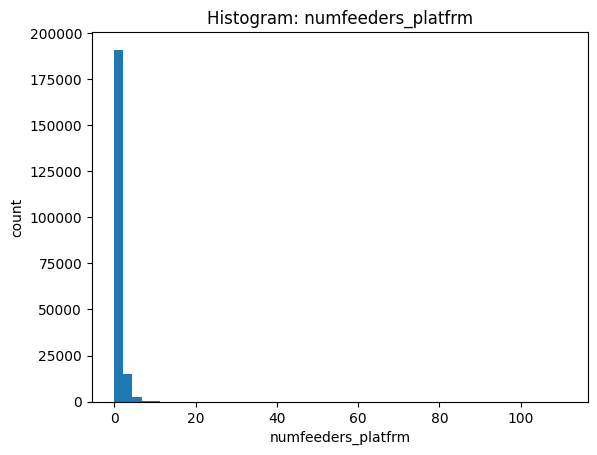

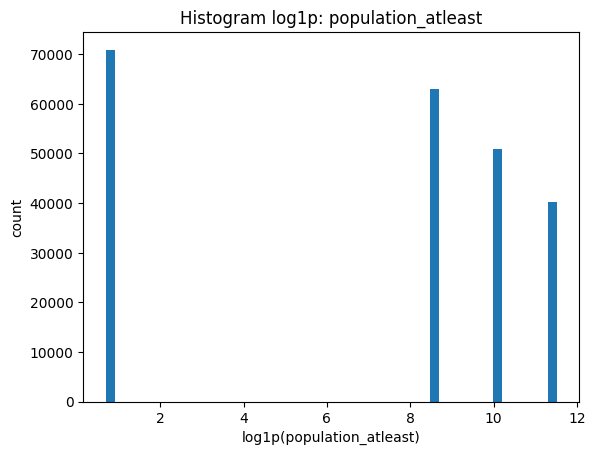

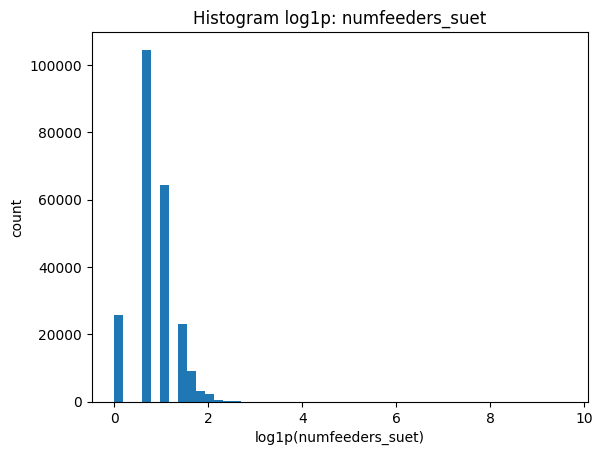

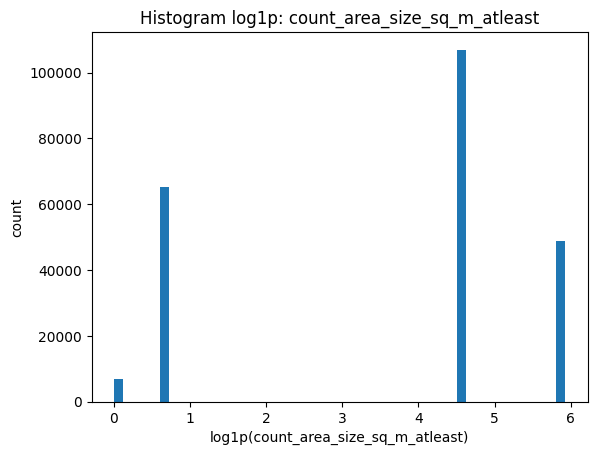

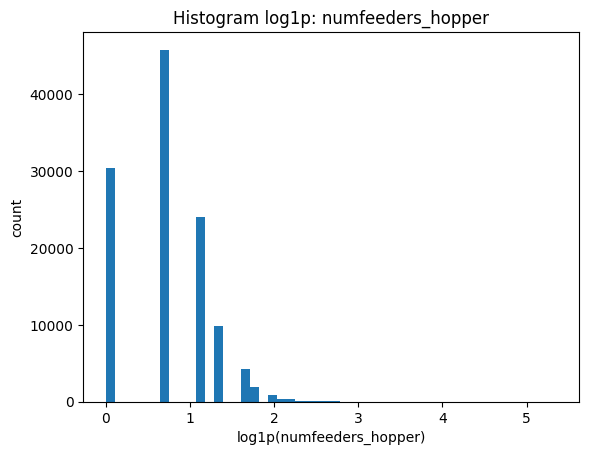

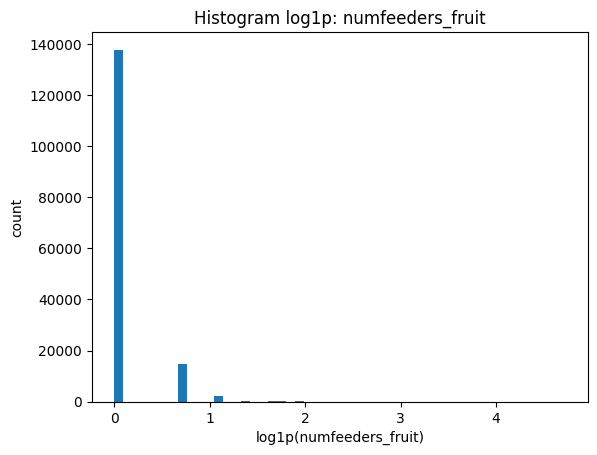

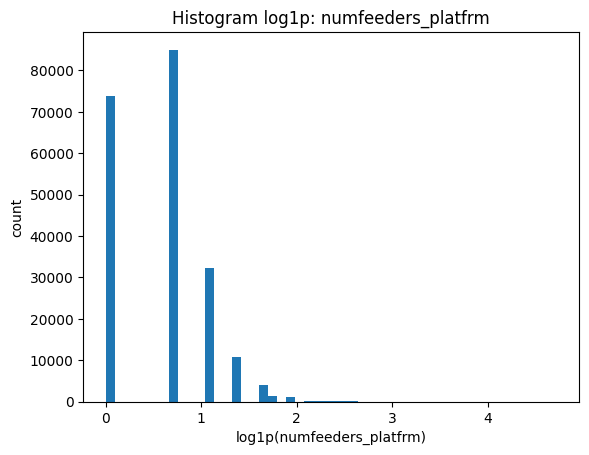

In [ ]:
def quick_numeric_summary(cols):
    out = []
    for c in cols:
        s = df[c]
        if not pd.api.types.is_numeric_dtype(s):
            continue
        out.append({
            "col": c,
            "non_null": s.notna().sum(),
            "missing_pct": (s.isna().mean() * 100),
            "mean": s.mean(skipna=True),
            "std": s.std(skipna=True),
            "min": s.min(skipna=True),
            "p50": s.quantile(0.50),
            "p90": s.quantile(0.90),
            "p99": s.quantile(0.99),
            "max": s.max(skipna=True),
            "zero_frac": (s.fillna(0).eq(0)).mean()
        })
    return pd.DataFrame(out).sort_values("missing_pct", ascending=False)

summary_all = quick_numeric_summary(all_feature_cols)
display(summary_all.head(20))

# Plot a few "count" type columns to see long tail (choose top by max)
count_like = [c for c in (veg_struct_cols + numfeeder_cols + scale_cols) if c in df.columns]
max_rank = summary_all[summary_all["col"].isin(count_like)].sort_values("max", ascending=False)
to_plot = max_rank["col"].head(6).tolist()

for c in to_plot:
    plt.figure()
    s = df[c].dropna()
    plt.hist(s, bins=50)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c); plt.ylabel("count")
    plt.show()

# Optional: log1p view for heavy tails
for c in to_plot:
    plt.figure()
    s = df[c].dropna()
    plt.hist(np.log1p(s), bins=50)
    plt.title(f"Histogram log1p: {c}")
    plt.xlabel(f"log1p({c})"); plt.ylabel("count")
    plt.show()


##(3) "Environment type" structure

In [ ]:
# =========================
# 3) "Environment type" structure
#    3.1 Yard / Habitat: is it single-dominant or mixed?
# =========================
# Treat yard/hab cols as 0/1-ish (or proportions). We'll compute:
# - number of active types per site
# - dominant type per site (argmax)
def active_count(df_sub, thresh=0.5):
    # if these columns are 0/1 -> thresh=0.5 works; if they are 0/100 or proportions, adjust later
    return (df_sub.fillna(0) > thresh).sum(axis=1)

yard_active = active_count(df[yard_cols], thresh=0.5) if len(yard_cols) else pd.Series([np.nan]*len(df))
hab_active  = active_count(df[hab_cols],  thresh=0.5) if len(hab_cols)  else pd.Series([np.nan]*len(df))

print("\nActive yard types per site (value counts):")
display(yard_active.value_counts().head(15))

print("\nActive habitat types per site (value counts):")
display(hab_active.value_counts().head(15))

# Dominant type (argmax) – useful for "type labels" in EDA narrative
def dominant_label(df_sub):
    sub = df_sub.copy()
    sub = sub.fillna(-np.inf)  # so missing won't win
    return sub.idxmax(axis=1)

if len(yard_cols):
    df["yard_dominant"] = dominant_label(df[yard_cols])
if len(hab_cols):
    df["hab_dominant"] = dominant_label(df[hab_cols])

if "yard_dominant" in df.columns:
    print("\nTop dominant yard types:")
    display(df["yard_dominant"].value_counts().head(10))

if "hab_dominant" in df.columns:
    print("\nTop dominant habitat types:")
    display(df["hab_dominant"].value_counts().head(10))


Active yard types per site (value counts):


,count
2,93709
1,92071
0,68555
3,20



Active habitat types per site (value counts):


,count
4,43998
3,43484
5,36417
2,32135
0,26565
6,25235
1,16725
7,15265
8,8574
9,4012



Top dominant yard types:


,count
yard_dominant,
yard_type_landsca,156660
yard_type_pavement,68887
yard_type_woods,19709
yard_type_garden,7640
yard_type_desert,1459



Top dominant habitat types:


,count
hab_dominant,
hab_dcid_woods,128535
hab_mixed_woods,66670
hab_residential,18340
hab_park,18321
hab_evgr_woods,12432
hab_water_fresh,6613
hab_orchard,1452
hab_water_salt,709
hab_agricultural,562


## (4) Co-occurrence / association

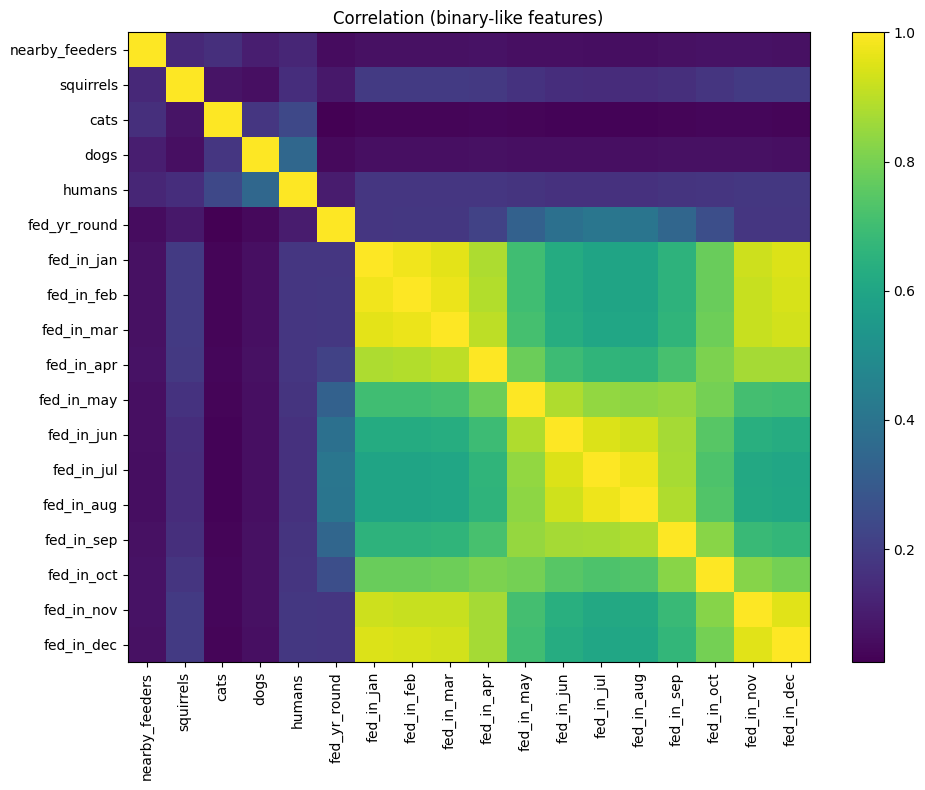


Top disturbance co-occurrences:


cooccur_count
humans    squirrels              146172
dogs      humans                 105640
cats      humans                 101052
          squirrels               94212
dogs      squirrels               91634
squirrels nearby_feeders          80886
humans    nearby_feeders          78562
cats      dogs                    66943
          nearby_feeders          56141
dogs      nearby_feeders          51957

In [ ]:
# =========================
# 4) Co-occurrence / association
#    A) Disturbance co-occurrence (cats/dogs/humans etc.)
# =========================
binary_like = ["nearby_feeders", "squirrels", "cats", "dogs", "humans", "fed_yr_round"] + feed_month_cols
binary_like = [c for c in binary_like if c in df.columns]

# Convert to 0/1 safely (assumes data is 0/1; if it's 1/2 or other coding, adjust here)
bin_df = df[binary_like].copy()
for c in binary_like:
    bin_df[c] = bin_df[c].fillna(0)
    # If it contains values other than 0/1, make it binary: >0 -> 1
    bin_df[c] = (bin_df[c] > 0).astype(int)

corr_bin = bin_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_bin, aspect="auto")
plt.xticks(range(len(corr_bin.columns)), corr_bin.columns, rotation=90)
plt.yticks(range(len(corr_bin.columns)), corr_bin.columns)
plt.title("Correlation (binary-like features)")
plt.colorbar()
plt.tight_layout()
plt.show()

# Co-occurrence counts for disturbance
disturb_bin_cols = [c for c in ["cats","dogs","humans","squirrels","nearby_feeders"] if c in bin_df.columns]
cooc = {}
for i, a in enumerate(disturb_bin_cols):
    for b in disturb_bin_cols[i+1:]:
        cooc[(a,b)] = int(((bin_df[a]==1) & (bin_df[b]==1)).sum())
cooc_table = pd.Series(cooc).sort_values(ascending=False).to_frame("cooccur_count")
print("\nTop disturbance co-occurrences:")
display(cooc_table.head(10))


##(5) Feeding strategy patterns

Total feeders, diversity of feeder types, and their relationship with disturbance

,numfeeders_total,numfeeders_types_used
count,254355.000000,254355.000000
mean,7.585021,3.962210
std,29.871398,1.646756
min,0.000000,0.000000
25%,4.000000,3.000000
50%,7.000000,4.000000
75%,10.000000,5.000000
max,14850.000000,8.000000


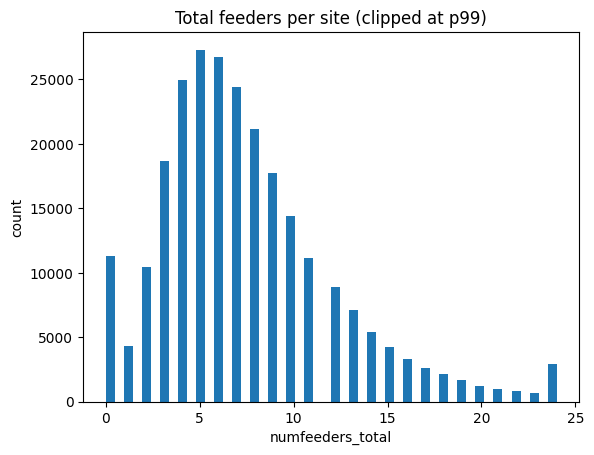

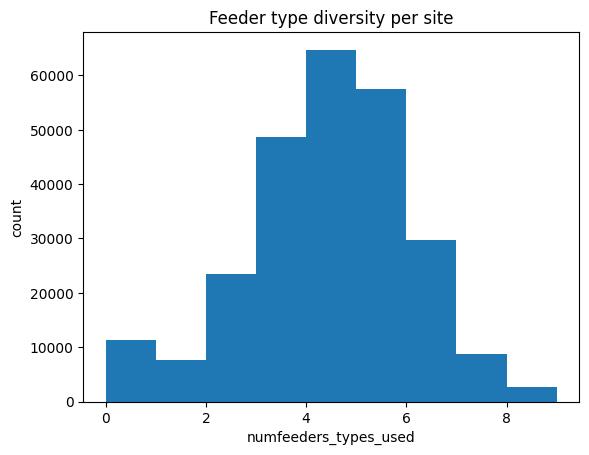


Disturbance rates by feeder bin (mean of 0/1):


/tmp/ipython-input-2833479186.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_by_bin = tmp.groupby("feeder_bin")[rel_cols].mean()


,cats,dogs,humans,squirrels
feeder_bin,,,,
"(-0.001, 4.0]",0.399776,0.381577,0.633692,0.612994
"(4.0, 6.0]",0.494376,0.471845,0.752525,0.780273
"(6.0, 8.0]",0.497332,0.484002,0.754925,0.794387
"(8.0, 11.0]",0.508947,0.499433,0.767691,0.807643
"(11.0, 14850.0]",0.504387,0.526133,0.787458,0.821197


In [ ]:
# Total number of feeders (sum of numfeeders_*; treat missing as 0)
numfeeder_exist = [c for c in numfeeder_cols if c in df.columns]
if len(numfeeder_exist):
    df["numfeeders_total"] = df[numfeeder_exist].fillna(0).sum(axis=1)
    df["numfeeders_types_used"] = (df[numfeeder_exist].fillna(0) > 0).sum(axis=1)

    display(df[["numfeeders_total","numfeeders_types_used"]].describe())

    plt.figure()
    plt.hist(df["numfeeders_total"].clip(upper=df["numfeeders_total"].quantile(0.99)), bins=50)
    plt.title("Total feeders per site (clipped at p99)")
    plt.xlabel("numfeeders_total"); plt.ylabel("count")
    plt.show()

    plt.figure()
    plt.hist(df["numfeeders_types_used"], bins=range(int(df["numfeeders_types_used"].max())+2))
    plt.title("Feeder type diversity per site")
    plt.xlabel("numfeeders_types_used"); plt.ylabel("count")
    plt.show()

# Relationship: do high-feeder sites have more cats/dogs/humans?
rel_cols = []
for c in ["cats","dogs","humans","squirrels"]:
    if c in bin_df.columns:
        rel_cols.append(c)

if "numfeeders_total" in df.columns and rel_cols:
    tmp = pd.concat([df["numfeeders_total"], bin_df[rel_cols]], axis=1)
    # Bin total feeders into quantiles
    tmp["feeder_bin"] = pd.qcut(tmp["numfeeders_total"], q=5, duplicates="drop")
    rate_by_bin = tmp.groupby("feeder_bin")[rel_cols].mean()
    print("\nDisturbance rates by feeder bin (mean of 0/1):")
    display(rate_by_bin)

## (6) Unsupervised-ready preprocessing + PCA (for "structure" intuition)


PCA explained variance ratio (2 comps): [0.1326 0.0707]
Total explained (2 comps): 0.2033


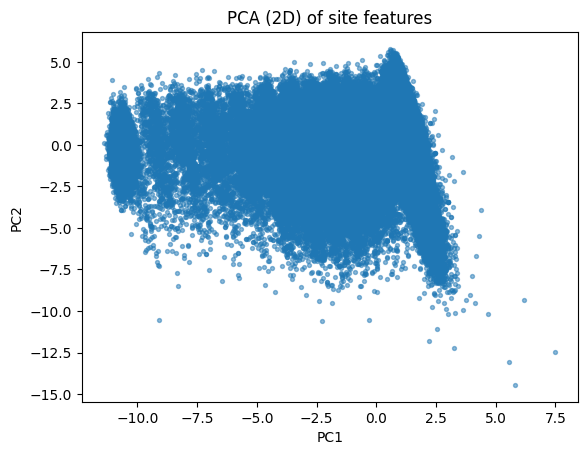

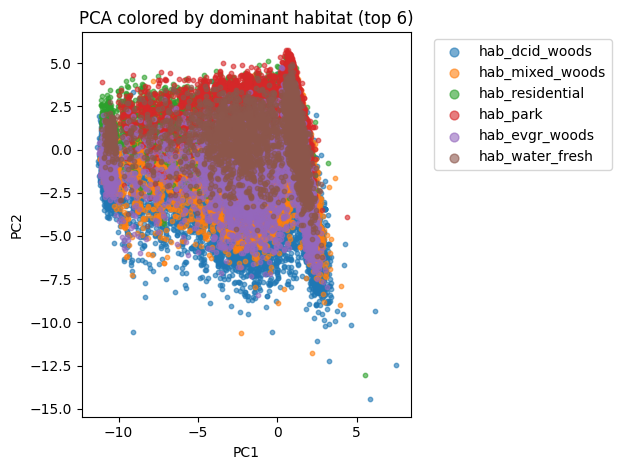

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[all_feature_cols].copy()

# Make sure numeric
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors="coerce")

# Impute missing -> median (simple, robust for EDA)
imp = SimpleImputer(strategy="median")
X_imp = imp.fit_transform(X)

# Scale -> important for PCA / clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("\nPCA explained variance ratio (2 comps):", pca.explained_variance_ratio_.round(4))
print("Total explained (2 comps):", round(pca.explained_variance_ratio_.sum(), 4))

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], s=8, alpha=0.5)
plt.title("PCA (2D) of site features")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Optional: color by dominant habitat/yard to see if "types" separate in PCA space
if "hab_dominant" in df.columns:
    # take top 6 labels for readability
    top_hab = df["hab_dominant"].value_counts().head(6).index.tolist()
    mask = df["hab_dominant"].isin(top_hab)
    plt.figure()
    for label in top_hab:
        m = mask & (df["hab_dominant"] == label)
        plt.scatter(X_pca[m,0], X_pca[m,1], s=10, alpha=0.6, label=label)
    plt.title("PCA colored by dominant habitat (top 6)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(markerscale=2, bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()


##(7) Fast Clustering

MiniBatchKMeans for speed

Silhouette on a sample

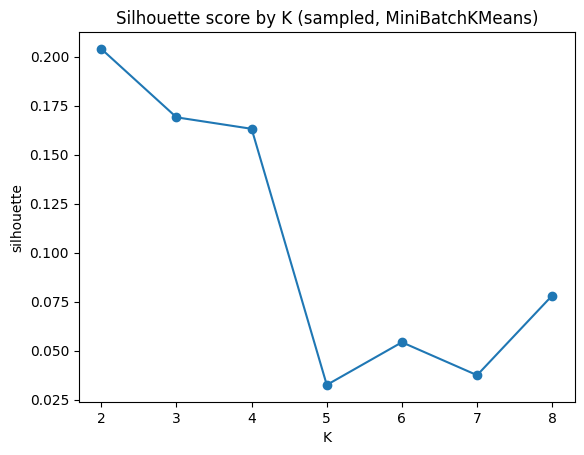

Best K by sampled silhouette: 2

Cluster sizes:


,count
cluster,
0,48833
1,205522


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# 1) sample for silhouette to avoid O(n^2)
n = X_scaled.shape[0]
sample_size = min(8000, n)
rng = np.random.RandomState(42)
sample_idx = rng.choice(n, size=sample_size, replace=False)
X_samp = X_scaled[sample_idx]

Ks = [2,3,4,5,6,7,8]
sil_scores = []

for k in Ks:
    km = MiniBatchKMeans(
        n_clusters=k, random_state=42,
        batch_size=2048, n_init=10
    )
    labels = km.fit_predict(X_scaled)           # Full clustering
    sil = silhouette_score(X_samp, labels[sample_idx])  # Calculate the silhouette score only on a sample
    sil_scores.append(sil)

plt.figure()
plt.plot(Ks, sil_scores, marker="o")
plt.title("Silhouette score by K (sampled, MiniBatchKMeans)")
plt.xlabel("K"); plt.ylabel("silhouette")
plt.show()

best_k = Ks[int(np.argmax(sil_scores))]
print("Best K by sampled silhouette:", best_k)

km = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=2048, n_init=10)
df["cluster"] = km.fit_predict(X_scaled)

print("\nCluster sizes:")
display(df["cluster"].value_counts().sort_index())

##(8) Anomaly detection (extreme / weird sites)

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(random_state=42, contamination=0.01)
anom_score = -iso.fit(X_scaled).score_samples(X_scaled)  # higher = more anomalous
df["anomaly_score"] = anom_score

top_anom = df.sort_values("anomaly_score", ascending=False).head(20)
print("\nTop 20 anomalies (highest anomaly_score):")
display(top_anom[id_cols + ["cluster","anomaly_score"] + (["numfeeders_total"] if "numfeeders_total" in df.columns else [])])

# Inspect one or two anomalies in detail
example_idx = top_anom.index[0]
print("\nMost anomalous row feature snapshot:")
display(df.loc[example_idx, id_cols + ["cluster","anomaly_score"] + all_feature_cols].to_frame("value").head(50))


Top 20 anomalies (highest anomaly_score):


,loc_id,proj_period_id,cluster,anomaly_score,numfeeders_total
115382,L2866057,PFW_2014,0,0.676955,0.0
64634,L201062,PFW_2005,0,0.675952,31.0
27498,L132600,PFW_2014,0,0.674033,0.0
217403,L72535,PFW_2021,1,0.673060,61.0
217398,L72535,PFW_2016,1,0.673060,61.0
217399,L72535,PFW_2017,1,0.673060,61.0
217400,L72535,PFW_2018,1,0.673060,61.0
217401,L72535,PFW_2019,1,0.673060,61.0
217402,L72535,PFW_2020,1,0.673060,61.0
122460,L3058634,PFW_2014,0,0.669921,0.0



Most anomalous row feature snapshot:


,value
loc_id,L2866057
proj_period_id,PFW_2014
cluster,0
anomaly_score,0.676955
yard_type_pavement,0.0
yard_type_garden,0.0
yard_type_landsca,0.0
yard_type_woods,0.0
yard_type_desert,1.0
hab_dcid_woods,0.0


## Question

Q1, Are there a small number of distinct and interpretable “site typologies” that naturally emerge when considering habitat composition, yard type, feeding intensity, and human/animal disturbance together, and how do these typologies differ in their ecological and human-interaction characteristics?

Q2, Do feeding sites cluster into distinct behavioral strategies based on the number and diversity of feeder types and feeding frequency across months, such as “light seasonal feeders” versus “intensive year-round feeders,” and how different are these strategies in scale and consistency?


#2 EDA for PFW_2021_public

In [ ]:
import pandas as pd

# Load the datasets
df_site = pd.read_csv('/content/PFW_count_site_data_public_2021.csv')
df_pfw = pd.read_csv('/content/PFW_2021_public.csv')

# Display the first 5 rows of df_site
print("First 5 rows of df_site:")
display(df_site.head())

# Display the first 5 rows of df_pfw
print("\nFirst 5 rows of df_pfw:")
display(df_pfw.head())

First 5 rows of df_site:


,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L100016,PFW_2002,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.01
1,L100016,PFW_2003,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
2,L100016,PFW_2004,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
3,L100016,PFW_2005,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
4,L100016,PFW_2006,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.01



First 5 rows of df_pfw:


,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method
0,L981010,52.129760,-122.135470,CA-BC,POSTCODE LAT/LONG LOOKUP,S83206450,OBS1092604618,3,4,2021,...,20,1,0,1,0,1,0,1.001,5.0,PFW Web 4.1.4
1,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,12,19,2020,...,11,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4
2,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,2,13,2021,...,2,1,0,1,1,1,1,8.001,5.0,PFW Web 4.1.4
3,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,1,13,2021,...,2,1,0,1,1,1,1,4.001,0.0,PFW Web 4.1.4
4,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,1,11,2021,...,10,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4



This EDA include displaying the first few rows, column names, data types, and non-null counts; calculating descriptive statistics for numerical columns; identifying and displaying the count and percentage of missing values; examining the number of unique values for each column; and generating visualizations (histograms for numerical columns and bar plots for categorical columns) to show the distributions of key columns. Finally, summarize the key findings from this EDA, including insights into data quality, distributions, and potential relationships.

## Display Basic Information



In [ ]:
print("First 5 rows of df_pfw:")
display(df_pfw.head())

print("\nSummary information of df_pfw:")
df_pfw.info()

First 5 rows of df_pfw:


,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method
0,L981010,52.129760,-122.135470,CA-BC,POSTCODE LAT/LONG LOOKUP,S83206450,OBS1092604618,3,4,2021,...,20,1,0,1,0,1,0,1.001,5.0,PFW Web 4.1.4
1,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,12,19,2020,...,11,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4
2,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,2,13,2021,...,2,1,0,1,1,1,1,8.001,5.0,PFW Web 4.1.4
3,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,1,13,2021,...,2,1,0,1,1,1,1,4.001,0.0,PFW Web 4.1.4
4,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,1,11,2021,...,10,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4



Summary information of df_pfw:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loc_id              100000 non-null  object 
 1   latitude            100000 non-null  float64
 2   longitude           100000 non-null  float64
 3   subnational1_code   100000 non-null  object 
 4   entry_technique     96567 non-null   object 
 5   sub_id              100000 non-null  object 
 6   obs_id              100000 non-null  object 
 7   Month               100000 non-null  int64  
 8   Day                 100000 non-null  int64  
 9   Year                100000 non-null  int64  
 10  PROJ_PERIOD_ID      100000 non-null  object 
 11  species_code        100000 non-null  object 
 12  how_many            100000 non-null  int64  
 13  valid               100000 non-null  int64  
 14  reviewed            100000 non-null  int64  
 15  day

## Generate Descriptive Statistics



In [ ]:
print("Descriptive statistics for numerical columns in df_pfw:")
display(df_pfw.describe())

Descriptive statistics for numerical columns in df_pfw:


,latitude,longitude,Month,Day,Year,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,99839.000000,91124.000000
mean,40.704300,-87.058880,5.144340,16.157190,2020.697140,3.706720,0.993440,0.00333,0.911700,0.786740,0.891590,0.774880,1.778081,2.098028
std,4.604687,15.996530,4.369059,8.579947,0.459497,6.878039,0.080728,0.05761,0.283732,0.409612,0.310899,0.417663,1.915754,4.565942
min,-33.137551,-157.949318,1.000000,1.000000,2020.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000
25%,38.358509,-93.337983,2.000000,9.000000,2020.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.001000,0.000000
50%,41.138752,-80.633625,3.000000,16.000000,2021.000000,2.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.001000,0.000000
75%,43.326733,-76.087478,11.000000,23.000000,2021.000000,4.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.001000,0.001000
max,65.519890,81.826172,12.000000,31.000000,2021.000000,500.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,8.001000,15.001000


## Examine Unique Values


In [ ]:
print("Number of unique values for each column in df_pfw:")
display(df_pfw.nunique().to_frame(name='Unique Count').sort_values(by='Unique Count', ascending=False))

Number of unique values for each column in df_pfw:


,Unique Count
obs_id,100000
sub_id,80913
loc_id,15287
longitude,15230
latitude,15228
species_code,361
how_many,110
entry_technique,107
subnational1_code,65
Day,31


## Generate Visualizations



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical and categorical columns
numerical_cols = df_pfw.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_pfw.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Numerical columns: ['latitude', 'longitude', 'Month', 'Day', 'Year', 'how_many', 'valid', 'reviewed', 'day1_am', 'day1_pm', 'day2_am', 'day2_pm', 'effort_hrs_atleast', 'snow_dep_atleast']
Categorical columns: ['loc_id', 'subnational1_code', 'entry_technique', 'sub_id', 'obs_id', 'PROJ_PERIOD_ID', 'species_code', 'Data_Entry_Method']


Generating histograms for key numerical columns...


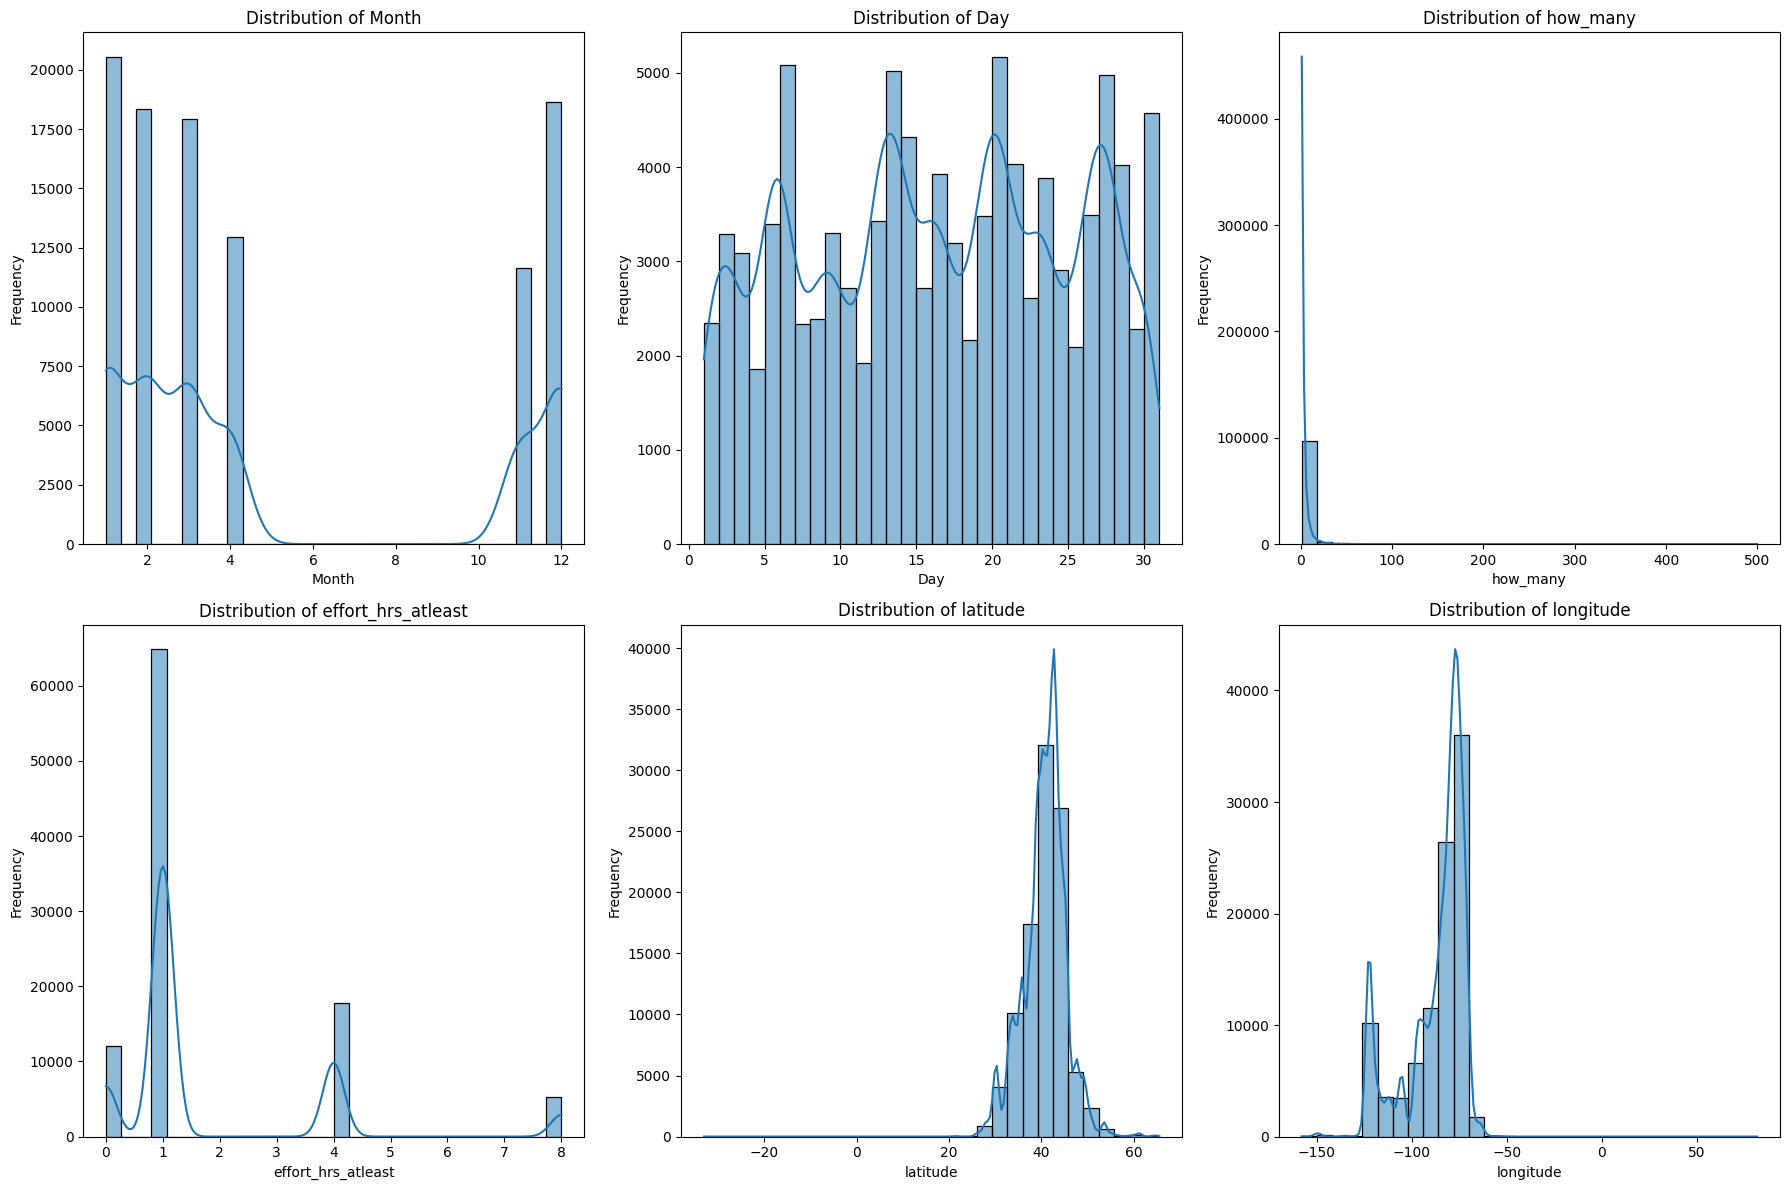

In [ ]:
print("Generating histograms for key numerical columns...")

# Select a few key numerical columns for histograms
selected_numerical_cols = ['Month', 'Day', 'how_many', 'effort_hrs_atleast', 'latitude', 'longitude']

plt.figure(figsize=(18, 12))
for i, col in enumerate(selected_numerical_cols, 1):
    plt.subplot(2, 3, i) # Arrange plots in a 2x3 grid
    sns.histplot(df_pfw[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Generating bar plots for key categorical columns...


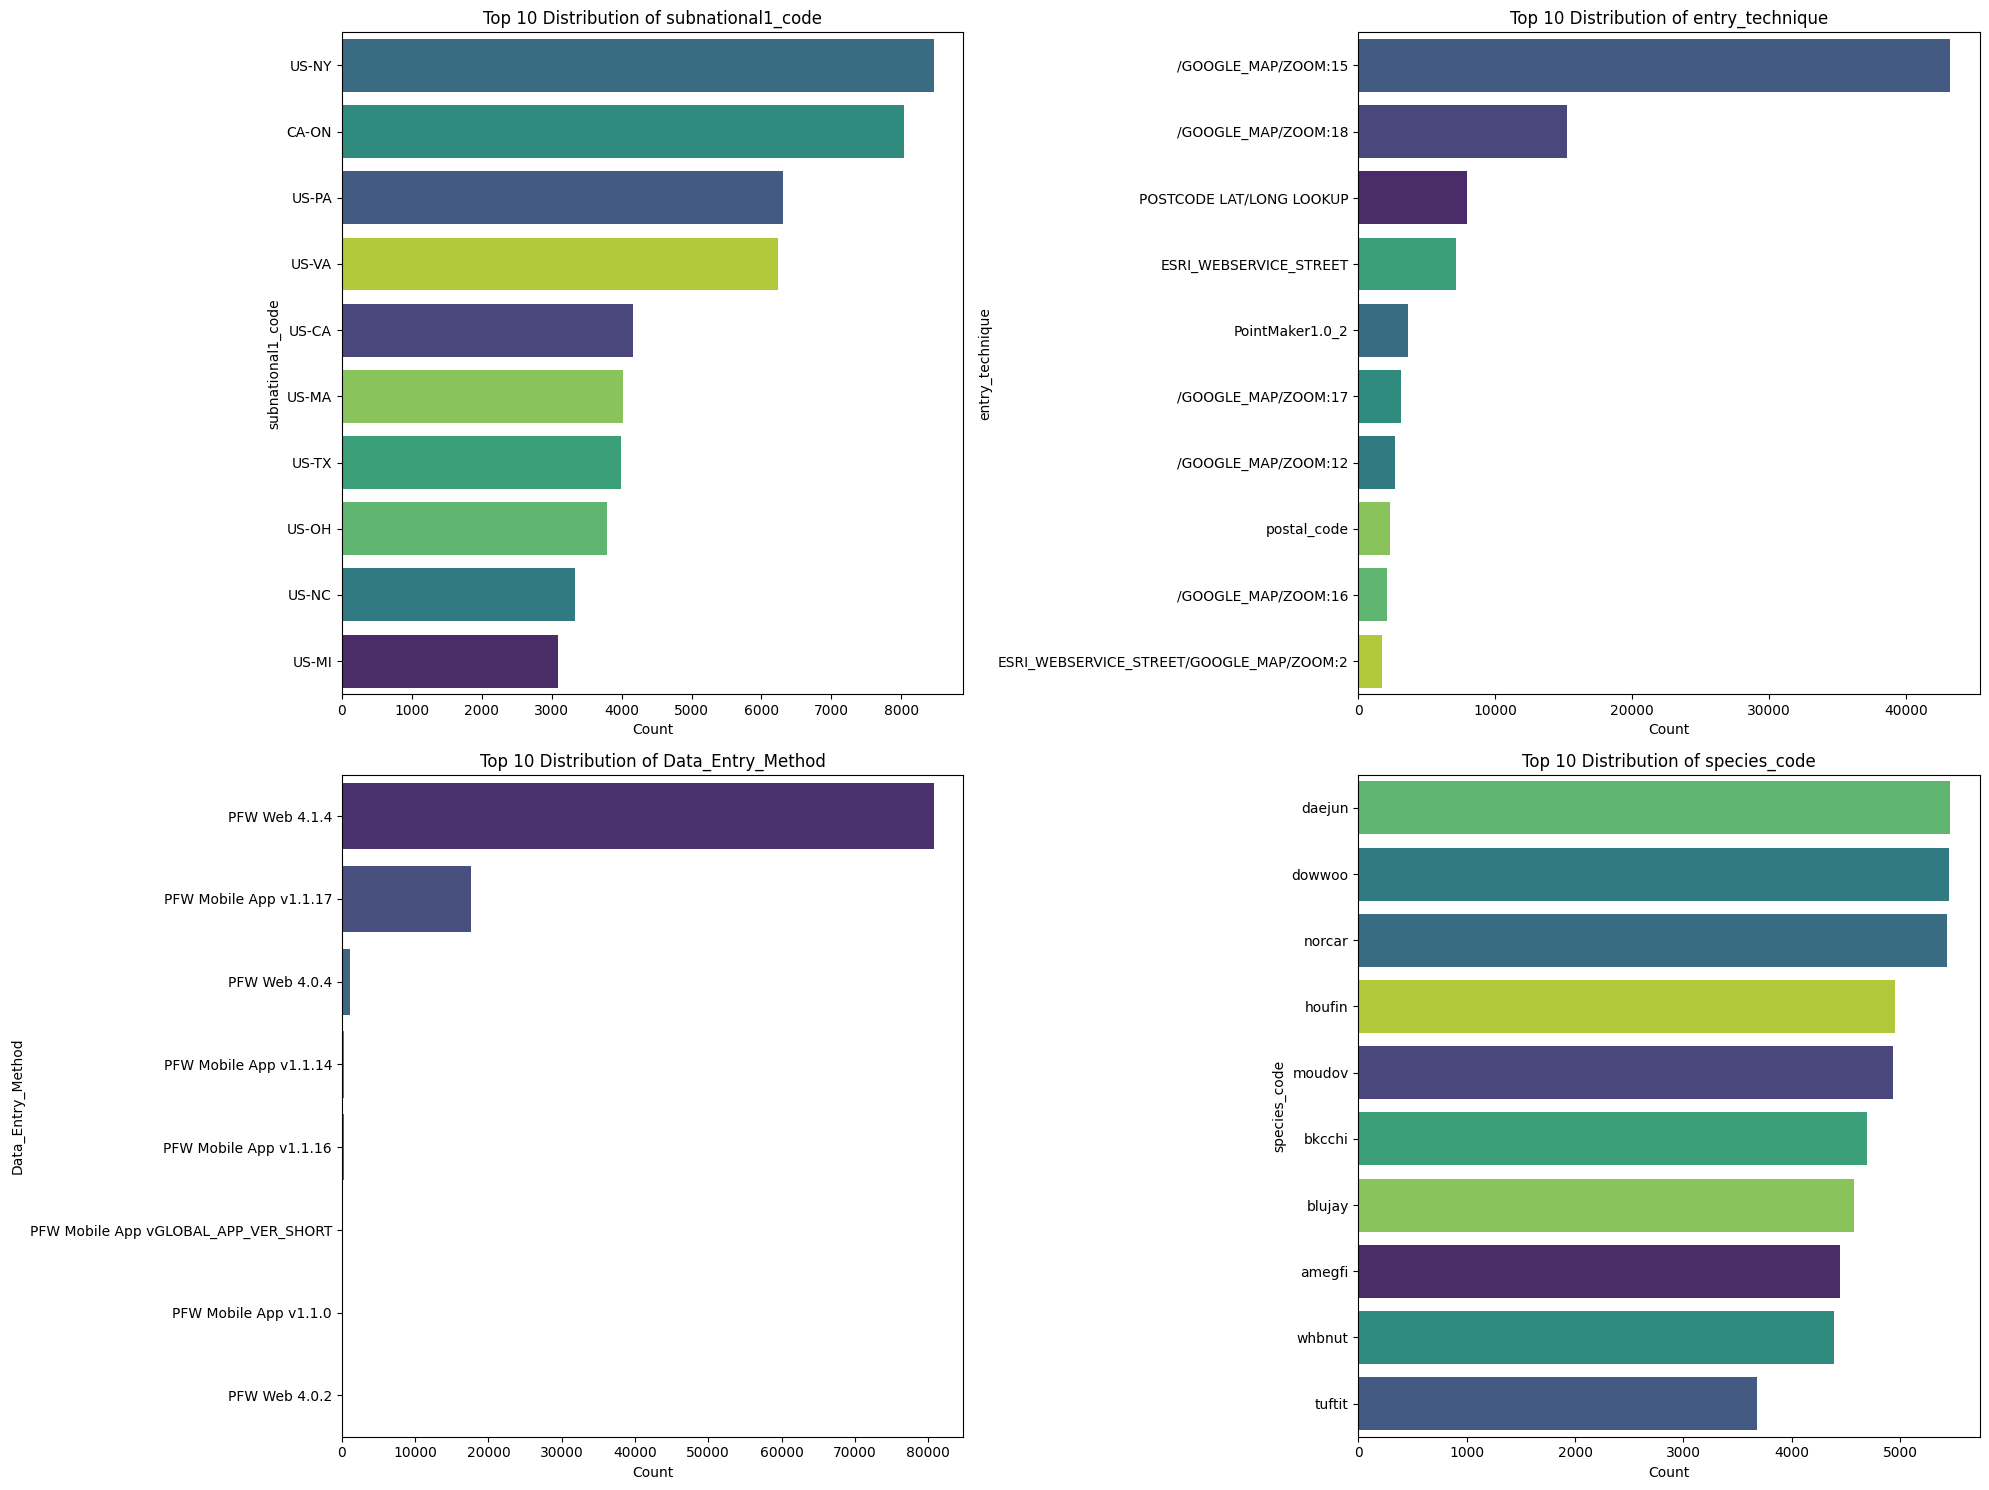

In [ ]:
print("Generating bar plots for key categorical columns...")

# Select a few key categorical columns for bar plots
selected_categorical_cols = ['subnational1_code', 'entry_technique', 'Data_Entry_Method', 'species_code']

plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_categorical_cols, 1):
    plt.subplot(2, 2, i) # Arrange plots in a 2x2 grid

    # For columns with many unique values, plot only the top 10
    if col in ['species_code', 'entry_technique', 'Data_Entry_Method', 'subnational1_code']:
        top_n_values = df_pfw[col].value_counts().nlargest(10).index
        sns.countplot(y=col, data=df_pfw[df_pfw[col].isin(top_n_values)], order=top_n_values, hue=col, legend=False, palette='viridis')
        plt.title(f'Top 10 Distribution of {col}')
    else:
        sns.countplot(y=col, data=df_pfw, order=df_pfw[col].value_counts().index, hue=col, legend=False, palette='viridis')
        plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `df_pfw` DataFrame consists of 100,000 entries and 22 columns, comprising 14 numerical (4 float64, 10 int64) and 8 categorical (object) columns.
*   **Missing Values**:
    *   `snow_dep_atleast` has the highest percentage of missing values at approximately 8.88% (8,876 entries).
    *   `entry_technique` is missing for about 3.43% (3,433 entries).
    *   `effort_hrs_atleast` has a minor proportion of missing values, at 0.16% (161 entries).
*   **Geographical and Temporal Coverage**: Observations span a wide geographical range (indicated by `latitude` and `longitude` distributions) and primarily occurred in the years 2020 and 2021, with `Month` and `Day` distributions suggesting potential seasonality.
*   **Observation Counts (`how_many`)**: The number of birds observed per species ranges from 1 to 500, with a mean of approximately 3.7. The distribution is heavily right-skewed, indicating many observations of small counts and a few instances of large flocks.
*   **Effort Hours (`effort_hrs_atleast`)**: Most observation efforts are short, typically clustered around 1-2 hours, with a maximum of 8 hours. This column's distribution is also right-skewed.
*   **Snow Depth (`snow_dep_atleast`)**: The majority of observations record very low or zero snow depth, with higher depths occurring less frequently.
*   **Cardinality**:
    *   `species_code` has a high cardinality with 361 unique bird species recorded, reflecting diverse observations.
    *   `entry_technique` shows 107 unique methods of data submission.
    *   `subnational1_code` contains 65 unique state/province codes, with high participation observed from specific regions like US-PA, US-NY, and US-MI.
*   **Dominant Data Entry Methods**: 'PFW Web' is the most common `entry_technique`, and 'Web' is the predominant `Data_Entry_Method`, indicating a strong reliance on online submission.

### Insights or Next Steps

*   **Handle Missing Data Strategically**: Address the missing values in `snow_dep_atleast` (8.88%) and `entry_technique` (3.43%) by either imputation (e.g., median for numerical, 'Unknown' for categorical) or by analyzing if the absence of these values is inherently informative, as this could impact subsequent modeling or analysis.
*   **Explore Seasonal and Geographical Patterns**: Further investigate the temporal distributions of `Month` and `Day` in relation to `how_many` and `species_code` to identify potential seasonal trends in bird sightings. Similarly, analyze geographical patterns based on `latitude`, `longitude`, and `subnational1_code` to understand regional variations in bird distribution or observation effort.



Perform additional exploratory data analysis on the `df_pfw` DataFrame by: 1) calculating and displaying the number of unique checklists (`sub_id`) for each site (`loc_id`) and state (`subnational1_code`); 2) generating a heatmap to visualize the variation of 'effort_hrs_atleast' by 'subnational1_code' and 'Month'; 3) determining the percentage of observations where 'valid' is 0 and 'reviewed' is 1, broken down by 'subnational1_code', 'Month', and 'species_code'; and 4) summarizing the key findings from these analyses.

## Count Checklists per Site and State
Calculate and display the number of unique checklists (`sub_id`) for each site (`loc_id`) and each state (`subnational1_code`).


In [ ]:
print("Number of unique checklists (sub_id) per site (loc_id) and state (subnational1_code):")
unique_checklists_per_site_state = df_pfw.groupby(['loc_id', 'subnational1_code'])['sub_id'].nunique().reset_index()
unique_checklists_per_site_state = unique_checklists_per_site_state.rename(columns={'sub_id': 'unique_checklist_count'})
display(unique_checklists_per_site_state.head(20))

Number of unique checklists (sub_id) per site (loc_id) and state (subnational1_code):


,loc_id,subnational1_code,unique_checklist_count
0,L100032,US-MN,6
1,L100057,US-MA,9
2,L10007061,US-OH,6
3,L10011691,US-WA,11
4,L1001179,US-NC,5
5,L10011987,US-NY,8
6,L10012113,US-NY,3
7,L1001960,US-AK,6
8,L100209,US-MN,6
9,L10022420,US-PA,1


## Analyze Effort Hours by State and Month

Generate a heatmap to visualize how 'effort_hrs_atleast' varies by 'subnational1_code' (state) and 'Month'.


**Reasoning**:
To visualize how 'effort_hrs_atleast' varies by 'subnational1_code' and 'Month', I will first group the data by these columns, calculate the mean of 'effort_hrs_atleast', and then pivot the resulting DataFrame to create a suitable format for a heatmap.



Generating heatmap for average effort hours by state and month (Top 10 states with most observations)...


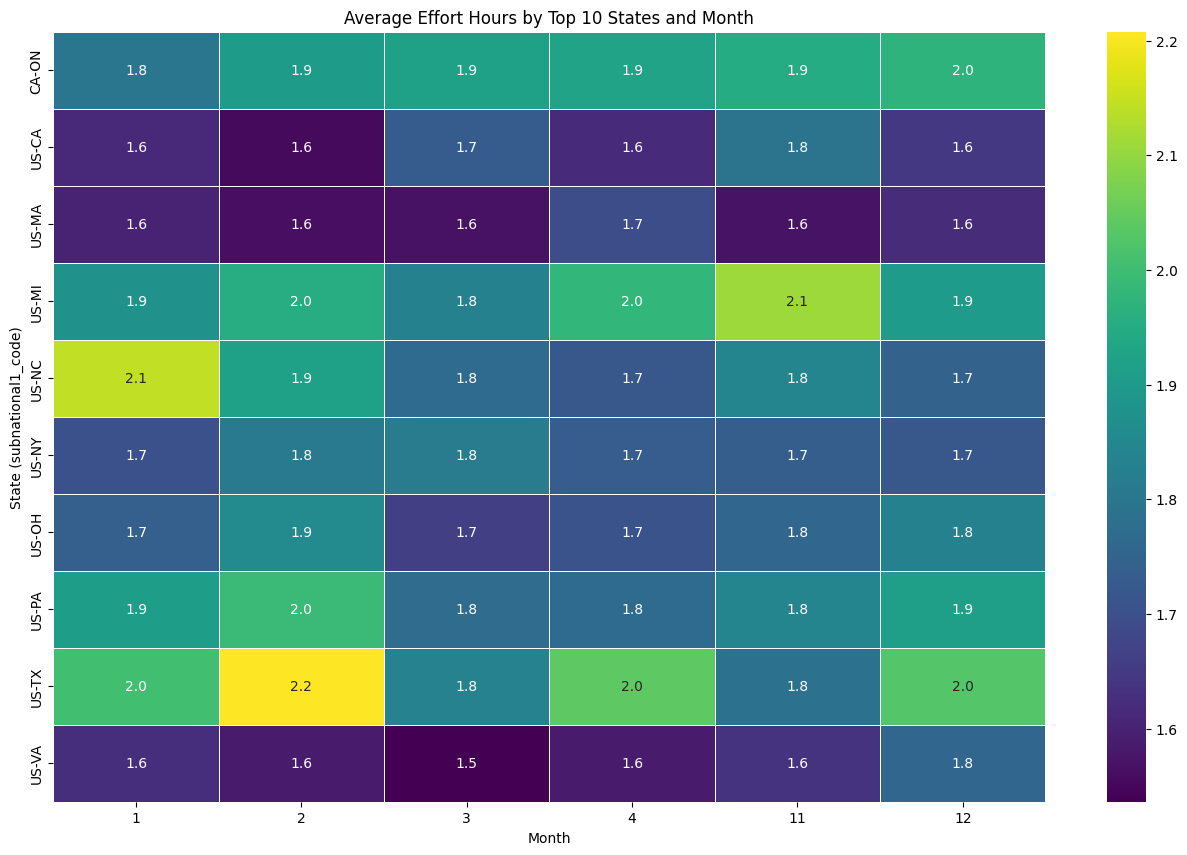

In [ ]:
print("Generating heatmap for average effort hours by state and month (Top 10 states with most observations)...")

# Get the top 10 states with the most observations
top_10_states = df_pfw['subnational1_code'].value_counts().nlargest(10).index

# Group by 'subnational1_code' and 'Month' and calculate the mean of 'effort_hrs_atleast'
effort_by_state_month = df_pfw.groupby(['subnational1_code', 'Month'])['effort_hrs_atleast'].mean().reset_index()

# Filter the grouped data for only the top 10 states
effort_by_state_month_filtered = effort_by_state_month[effort_by_state_month['subnational1_code'].isin(top_10_states)]

# Pivot the DataFrame for heatmap using the filtered data
heatmap_data = effort_by_state_month_filtered.pivot_table(index='subnational1_code', columns='Month', values='effort_hrs_atleast')

# Create the heatmap
plt.figure(figsize=(16, 10)) # Adjusted figure size for better readability
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Average Effort Hours by Top 10 States and Month')
plt.xlabel('Month')
plt.ylabel('State (subnational1_code)')
plt.show()


Perform a species co-occurrence analysis on the `df_pfw` DataFrame. This involves transforming the data into a checklist-species presence matrix, calculating a species co-occurrence matrix, constructing a network graph where species are nodes and co-occurrence frequency determines edge weights (with a defined threshold), and visualizing this network. Finally, summarize the key insights about species relationships and communities observed from the network.

## Prepare Data for Co-occurrence Analysis

Transform the `df_pfw` DataFrame to create a checklist-species presence matrix. For each unique checklist (`sub_id`), identify all unique `species_code` observed.


In [ ]:
print("Creating checklist-species presence matrix...")

# Create a cross-tabulation of sub_id and species_code
# This gives the count of each species in each checklist
checklist_species_counts = pd.crosstab(df_pfw['sub_id'], df_pfw['species_code'])

# Convert counts to binary (presence/absence)
# Any count > 0 becomes 1 (present), 0 remains 0 (absent)
presence_matrix = (checklist_species_counts > 0).astype(int)

print("First 5 rows and columns of the presence matrix:")
display(presence_matrix.head())

Creating checklist-species presence matrix...
First 5 rows and columns of the presence matrix:


species_code,abetow,accipi,acowoo,allhum,altori,ambduc,amecoo,amecro,amegfi,amekes,...,yebmag,yebsap,yehbla,yelwar,yerwar,yerwar3,yesfli,yetvir,yetwar,zebdov
sub_id,,,,,,,,,,,,,,,,,,,,,
S76222515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S76222722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S76222829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S76222835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S76222849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Calculating species co-occurrence matrix...")

# Calculate the co-occurrence matrix
# Transpose the presence_matrix and multiply it by the original presence_matrix
co_occurrence_matrix = presence_matrix.T.dot(presence_matrix)

print("First 5 rows and columns of the species co-occurrence matrix:")
display(co_occurrence_matrix.head())

To construct a network graph for species co-occurrence, I will use the `networkx` library to create the graph. I will iterate through the `co_occurrence_matrix` to add edges between species, using the co-occurrence count as the weight. A threshold will be applied to filter out weak co-occurrences to make the network more readable and meaningful. Finally, I will use `matplotlib` to visualize this network.



Constructing and visualizing species co-occurrence network...
Network created with 11 nodes and 32 edges (threshold > 100).


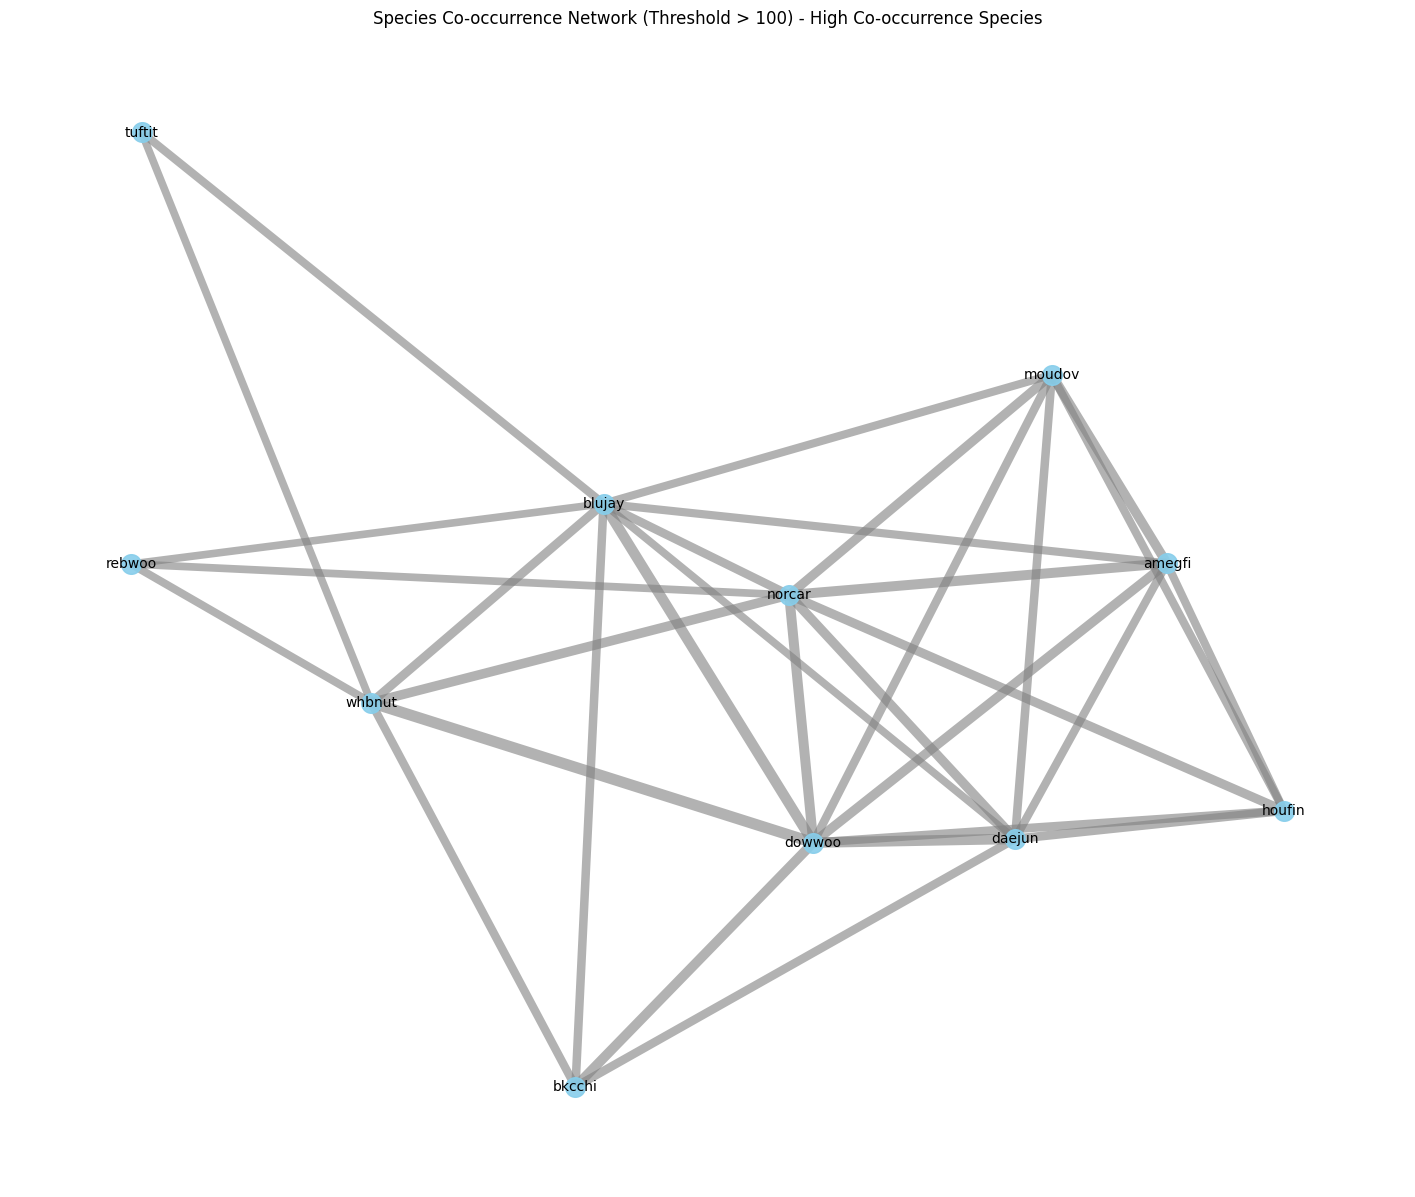

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

print("Constructing and visualizing species co-occurrence network...")

# Initialize a graph
G = nx.Graph()

# Define a co-occurrence threshold
# We will only add edges for co-occurrences above this value
# A higher threshold reduces the complexity of the graph
co_occurrence_threshold = 100 # Increased threshold for 'high co-occurrence'

# Add edges based on co-occurrence matrix
# Iterate through the upper triangle of the matrix to avoid duplicate edges and self-loops
for i in range(len(co_occurrence_matrix.columns)):
    for j in range(i + 1, len(co_occurrence_matrix.columns)): # Only upper triangle, exclude diagonal
        species1 = co_occurrence_matrix.columns[i]
        species2 = co_occurrence_matrix.columns[j]
        weight = co_occurrence_matrix.iloc[i, j]

        if weight > co_occurrence_threshold:
            G.add_edge(species1, species2, weight=weight)

# Remove isolated nodes (species not involved in any co-occurrence above the threshold)
# This ensures only species with significant co-occurrence are displayed
G.remove_nodes_from(list(nx.isolates(G)))

print(f"Network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges (threshold > {co_occurrence_threshold}).")

# Visualize the network
plt.figure(figsize=(18, 15)) # Larger figure size for better spread
pos = nx.spring_layout(G, k=0.3, iterations=50) # Adjust k and iterations for better node spacing

# Draw nodes (only the connected ones remain in G after removing isolates)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.9) # Increased node size

# Draw edges, scaling width by weight for better visualization of stronger co-occurrences
edges = G.edges(data=True)
weights = [d['weight'] for u, v, d in edges]
# Avoid division by zero if no edges meet the threshold
if weights:
    max_weight = max(weights)
    edge_widths = [w/max_weight*8 for w in weights] # Increased max width for edges
else:
    edge_widths = []
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, alpha=0.6, edge_color='gray')

# Draw labels for all remaining (connected) nodes in the filtered graph
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black') # Display labels for all visible nodes

plt.title(f'Species Co-occurrence Network (Threshold > {co_occurrence_threshold}) - High Co-occurrence Species')
plt.axis('off') # Hide axes
plt.show()

## Top Co-occurring Species Pairs

In [ ]:
print("Extracting and displaying the top co-occurring species pairs...")

# Get the upper triangle of the co-occurrence matrix to avoid duplicate pairs and self-co-occurrence
co_occurrence_pairs = co_occurrence_matrix.stack()
co_occurrence_pairs = co_occurrence_pairs[co_occurrence_pairs.index.get_level_values(0) < co_occurrence_pairs.index.get_level_values(1)]

# Rename the index levels to avoid column name conflict during reset_index
co_occurrence_pairs.index.set_names(['Species1', 'Species2'], inplace=True)

# Convert to DataFrame and rename the values column
co_occurrence_df = co_occurrence_pairs.reset_index(name='Co_occurrence_Count')

# Sort by co-occurrence count in descending order and display the top 10
top_co_occurring_species = co_occurrence_df.sort_values(by='Co_occurrence_Count', ascending=False).head(10)
display(top_co_occurring_species)

Extracting and displaying the top co-occurring species pairs...


,Species1,Species2,Co_occurrence_Count
33565,dowwoo,whbnut,147
32343,daejun,dowwoo,139
14007,blujay,dowwoo,139
3046,amegfi,norcar,132
33447,dowwoo,norcar,132
10443,bkcchi,dowwoo,130
52694,norcar,whbnut,126
3038,amegfi,moudov,126
32437,daejun,norcar,125
2952,amegfi,dowwoo,125


### Interpretation of Top Co-occurring Species

The table above highlights the species pairs that are most frequently observed together in the same checklists. These strong co-occurrences likely indicate species that share similar habitats, foraging behaviors, or ecological niches. They could also represent species that are commonly found in backyard settings or local parks, where observations are typically made. Analyzing these specific relationships can provide valuable insights into bird community structures and potential ecological dependencies within the observed environment.

##Questions
* Q3: If we describe each state by a small “participation profile” — for example: (1) average number of checklists per site, (2) percent of sites that submit only 1–2 checklists, and (3) average effort hours — do states naturally group into a few participation types? And which participation types are most likely to produce biased or unstable conclusions about bird communities (so the program should recruit more participants there or down-weight those states in summaries)?

* Q4: Do feeder birds show up in predictable ‘packs’—and can we use that to flag unusual checklists?” It has two parts: (1) discover typical species groupings, (2) find checklists that don’t fit those typical groupings